# RNN Algorithm on BitstampUSD dataset

<b> Load Dataset

In [6]:
# First step, import libraries.
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# Import the dataset and encode the date
df = pd.read_csv(r"C:\Users\santhosh\Downloads\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [9]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [14]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


<b> Data Clean

In [19]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [21]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [27]:
Real_Price

date
2011-12-31        4.471603
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.208159
                  ...     
2021-03-27    55193.357260
2021-03-28    55832.958824
2021-03-29    56913.993819
2021-03-30    58346.912268
2021-03-31    58764.349363
Name: Weighted_Price, Length: 3376, dtype: float64

<b> Exploratory Data Analysis

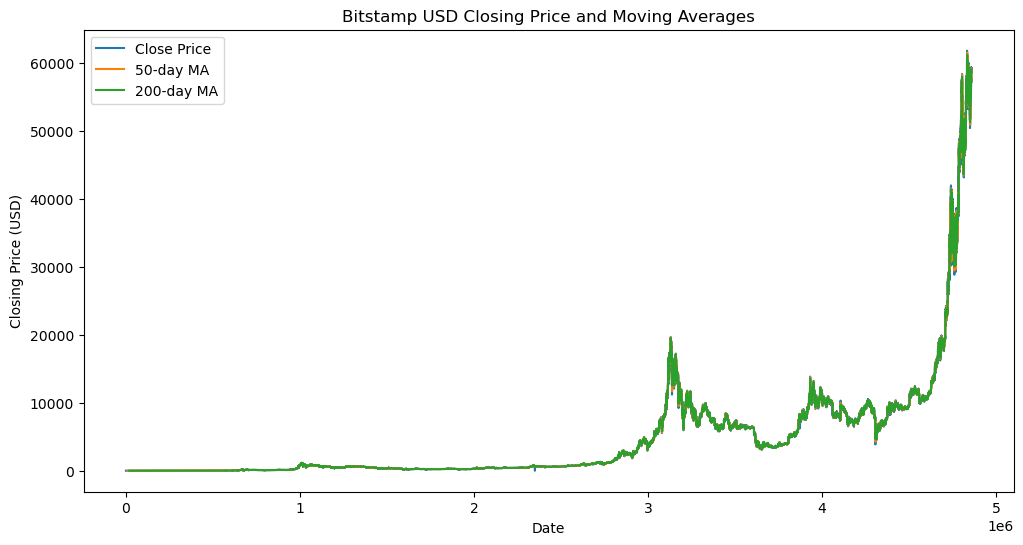

In [33]:
# Moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA50'], label='50-day MA')
plt.plot(df.index, df['MA200'], label='200-day MA')
plt.title('Bitstamp USD Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


                   Timestamp      Open      High       Low     Close  \
Timestamp           1.000000  0.650719  0.650644  0.650803  0.650714   
Open                0.650719  1.000000  0.999999  0.999999  0.999999   
High                0.650644  0.999999  1.000000  0.999998  0.999999   
Low                 0.650803  0.999999  0.999998  1.000000  0.999999   
Close               0.650714  0.999999  0.999999  0.999999  1.000000   
Volume_(BTC)       -0.103926 -0.051860 -0.051717 -0.052040 -0.051877   
Volume_(Currency)   0.228190  0.344074  0.344498  0.343541  0.344036   
Weighted_Price      0.650737  0.999999  0.999999  1.000000  1.000000   
MA50                0.650744  0.999979  0.999979  0.999978  0.999978   
MA200               0.650831  0.999919  0.999920  0.999916  0.999918   

                   Volume_(BTC)  Volume_(Currency)  Weighted_Price      MA50  \
Timestamp             -0.103926           0.228190        0.650737  0.650744   
Open                  -0.051860           0.344

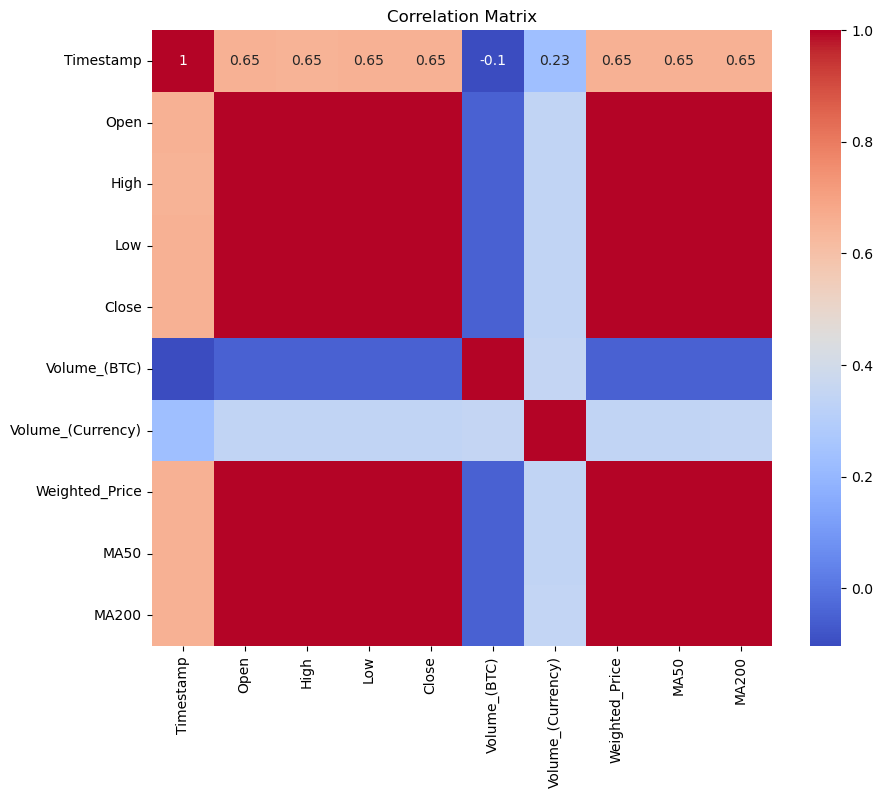

In [34]:
# Ensure only numeric columns are included in the correlation matrix calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<b> Train-Test Split

In [20]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]
df_train

date
2011-12-31        4.471603
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.208159
                  ...     
2021-02-25    49985.234815
2021-02-26    46655.920049
2021-02-27    47130.208060
2021-02-28    44818.447552
2021-03-01    47641.536899
Name: Weighted_Price, Length: 3346, dtype: float64

In [21]:
df_test

date
2021-03-02    48617.289321
2021-03-03    50429.449016
2021-03-04    49398.250399
2021-03-05    47717.643300
2021-03-06    48371.543538
2021-03-07    50218.216804
2021-03-08    50798.354212
2021-03-09    53980.847262
2021-03-10    55375.366241
2021-03-11    56272.596972
2021-03-12    56826.560033
2021-03-13    58802.601568
2021-03-14    60455.844831
2021-03-15    57507.734509
2021-03-16    55339.804792
2021-03-17    56158.017320
2021-03-18    58472.117322
2021-03-19    58283.547994
2021-03-20    58779.769387
2021-03-21    57312.598536
2021-03-22    56787.148422
2021-03-23    54703.387740
2021-03-24    55123.993855
2021-03-25    52121.684110
2021-03-26    53241.037489
2021-03-27    55193.357260
2021-03-28    55832.958824
2021-03-29    56913.993819
2021-03-30    58346.912268
2021-03-31    58764.349363
Name: Weighted_Price, dtype: float64

<b> Data Preprocessing

In [22]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

<b> Model Building

In [23]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100


C:\Users\santhosh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


669/669 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0744
Epoch 2/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0161
Epoch 3/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0145
Epoch 4/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0120
Epoch 5/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0079
Epoch 6/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054
Epoch 7/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032
Epoch 8/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.9649e-04
Epoch 9/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3763e-04
Epoch 10/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.4768e-05
Epoch 11/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5924e-05
Epoch 12/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.4507e-05
Epoch 13/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0939e-05
Epoch 14/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.3629e-05
Epoch 15/100
669/669 ━━━━━━

<b> Model Prediction

In [25]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<b> Predicted Values

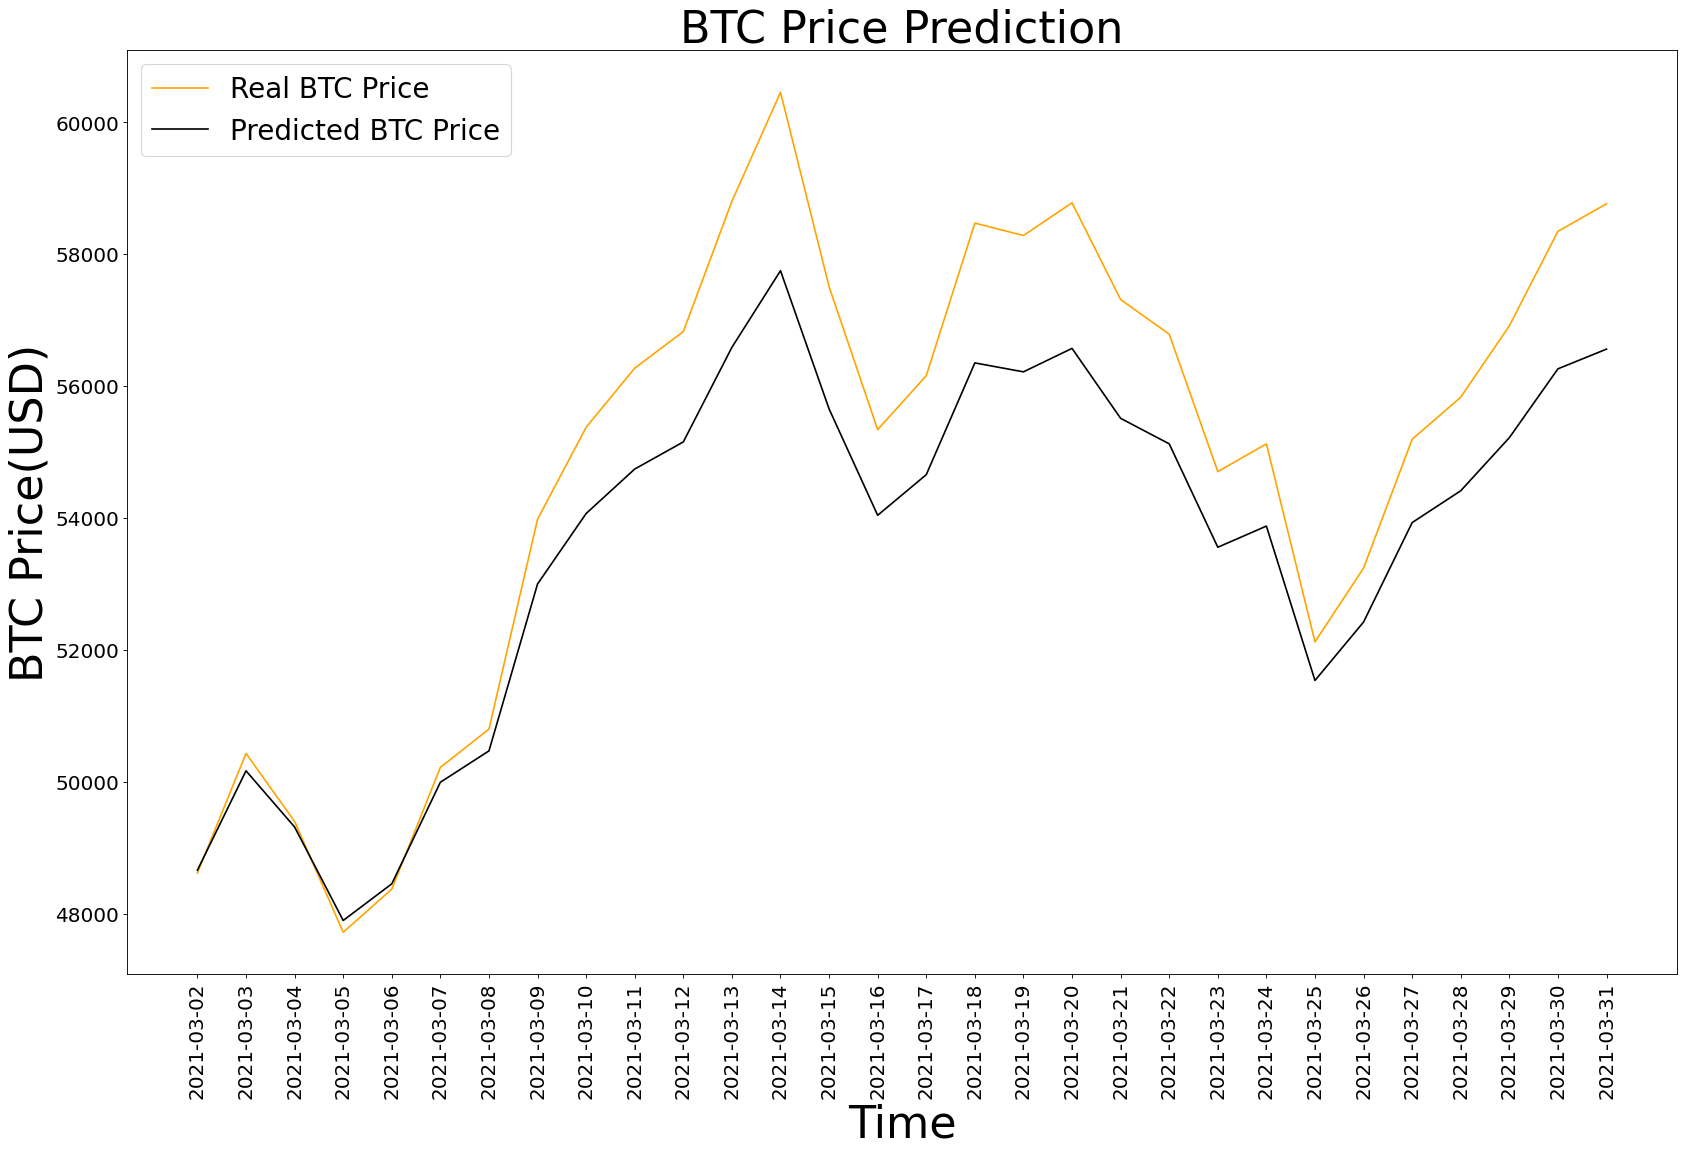

In [26]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'orange', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'black', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()